In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math


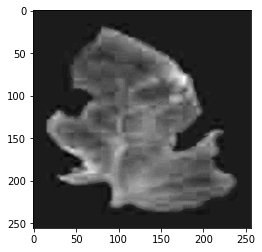

In [3]:

l1=cv2.cvtColor(cv2.imread('/home/aahan/Documents/Minor Project/Tomato Early Blight/EB1.jpg'),cv2.COLOR_BGR2RGB)
rows,col,channels=l1.shape
ims=cv2.cvtColor(l1,cv2.COLOR_RGB2LAB)
c=ims[:,:,2]
plt.imshow(c,cmap='gray')


l1=cv2.cvtColor(cv2.imread('/home/aahan/Documents/Minor Project/Tomato Early Blight/EB1.jpg'),cv2.COLOR_BGR2RGB)
rows,col,channels=l1.shape
ims=cv2.cvtColor(l1,)

In [151]:
l1c=l1.copy().reshape(rows*col,channels)
xyzArr=[]

for index,pixel in enumerate(l1c):
    sR,sG,sB=pixel
    r = ( sR / 255 )
    g = ( sG / 255 )
    b = ( sB / 255 )

    if r > 0.04045:
        r = ( ( r + 0.055 ) / 1.055 )** 2.4
    else:                   
        r = r / 12.92
        
    if g > 0.04045:
        g=( ( g + 0.055 ) / 1.055 )**2.4
        
    else:                   
        g = g / 12.92
        
    if b > 0.04045: 
        b = ( ( b + 0.055 ) / 1.055 )** 2.4
    else:
        b = b / 12.92

    r = r * 100
    g = g * 100
    b = b * 100

    x = r * 0.4124 + g * 0.3576 + b * 0.1805
    y = r * 0.2126 + g * 0.7152 + b * 0.0722
    z = r * 0.0193 + g * 0.1192 + b * 0.9505
    xyzArr.append([x,y,z])
xyzArr=np.array(xyzArr)

In [152]:
labArr=[]
for value in xyzArr:
    x,y,z=value
    refX=94.811
    refY=100.000
    refZ=107.304

    x = x / refX
    y = y / refY
    z = z / refZ

    if x > 0.008856 :
            x = x ** ( 1/3 )
            
    else:                    
        x = ( 7.787 * x ) + ( 16 / 116 )
        
    if y > 0.008856 : 
        y = y ** ( 1/3 )
        
    else:
        y = ( 7.787 * y ) + ( 16 / 116 )
        
    if  z > 0.008856:
        z = z**( 1/3 )
        
    else:
        z = ( 7.787 * z ) + ( 16 / 116 )
        

    ciel = (( 116 * x ) - 16)*255/100
    ciea = (500 * ( x - y ))+128
    cieb = (200 * ( y - z ))+128
    labArr.append([ciel,ciea,cieb])
    
labArr=np.array(labArr).reshape(rows,col,channels)


<h2>a Channel</h2>

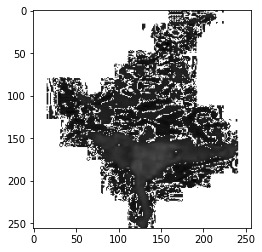

In [307]:
diseases=['Tomato Early Blight/EB','Tomato Late Blight/LB']
sampleNo=50
disIndex=1
l1=cv2.cvtColor(cv2.imread('/home/aahan/Documents/Minor Project/{}{}.jpg'.format(diseases[disIndex],sampleNo)),cv2.COLOR_BGR2LAB)
cp=l1.copy()

lchannel=l1[:,:,1]
rows,cols=lchannel.shape
lchannel=lchannel.reshape(rows*cols)
lchannelDup=[]
for _,pixel in enumerate(lchannel.flatten()):
    if pixel==128:
        lchannelDup.append(255)
        continue
    lchannelDup.append(255-pixel)
lchannelDup=np.array(lchannelDup).reshape(rows,cols)
lchannel=np.copy(lchannelDup)


plt.imshow(lchannel,cmap='gray')

<h2>Plotting the histogram</h2>

31370


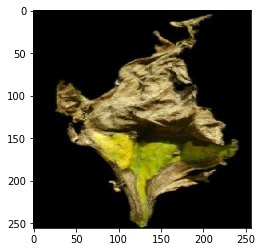

In [308]:
#improving the contrast of the image
rows,cols=lchannel.shape
lchannel=lchannel.reshape(rows*cols)
minP,maxP=np.amin(lchannel),np.amax(lchannel)

#min-max contrast enhancement
for index,pixel in enumerate(lchannel):
    lchannel[index]=(((pixel-minP)/(maxP-minP)))*255
lchannel=lchannel.reshape(rows,cols)
# plt.imshow(lchannel,cmap='gray')

totalLeafPix=0
# lchannelDup=lchannel.copy().flatten()
# for index,ele in enumerate(lchannelDup):
#     if ele==255:
#         lchannelDup[index]=0
#         continue
#     lchannelDup[index]=255
# lchannelDup=np.array(lchannelDup.reshape(rows,cols),dtype=np.uint8)
# kernel=np.ones((2,2),np.uint8)
# ed=cv2.erode(lchannelDup,kernel,iterations=2)
# plt.imshow(ed,cmap='gray')
# #calculating total leaf area
# for inde,pixel in enumerate(ed.flatten()):
#     if pixel==255:
#         totalLeafPix+=1
#     else:
#         continue
l2=cv2.cvtColor(cv2.imread('/home/aahan/Documents/Minor Project/{}{}.jpg'.format(diseases[disIndex],sampleNo)),cv2.COLOR_BGR2RGB)
for _,ele in enumerate(l2.reshape(-1,3)):
    if ele[0]==0 and ele[1]==0 and ele[2]==0:
        continue
    totalLeafPix+=1
print(totalLeafPix)
plt.imshow(l2)


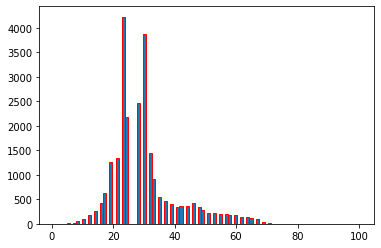

In [309]:
histo,bins,_=plt.hist(lchannel.flat,bins=100,range=(1,100),ec='red')
plt.show()

<h2>Finding the global Maxima</h2>

In [310]:
#histogram peak
maxHisto=np.amax(histo)
#starting index of the bin
maxBin=bins[np.where(histo==maxHisto)][0]
print('Bin is {}'.format(maxBin))
if maxBin<=40:
    maxVal=0.2*maxHisto
else:
    maxVal=0.5*maxHisto
print(maxVal)

#calculating R
import math
maxi=-math.inf
maxV=-math.inf
for index,ele in enumerate(histo):
    if ele >maxVal and ele !=maxHisto and ele>maxV:
        maxi=bins[index]
        maxV=ele
      
r=maxi
if r==(-math.inf):
    r=maxBin
print(r)
#calculating s
s=2*r/3
threshold=s
print(s)
print(threshold)

Bin is 22.78
845.6
29.71
19.80666666666667
19.80666666666667


(256, 256)


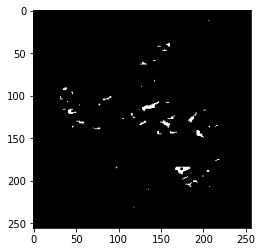

In [311]:
print(lchannel.shape)
rows,cols=lchannel.shape
lchannel=lchannel.reshape(rows*cols)
rArr=[]
for index,pixel in enumerate(lchannel):
    if pixel<threshold:
        rArr.append(0)
    else:
        rArr.append(255)
lchannel=np.array(rArr,np.uint8).reshape(rows,cols)
lchannel=np.array(lchannel,dtype=np.uint8)
lchannel=cv2.bitwise_not(lchannel)
kernel=np.ones((2,2),np.uint8)
eroded=cv2.erode(lchannel,kernel,iterations=2)
plt.imshow(eroded,cmap='gray')
lchannel=np.copy(eroded)

<h2>Quantification</h2>


Diseased Pixel Count : 569


Total Pixel Count : 31370


Percentage of leaf disease : 1.8138348740835193




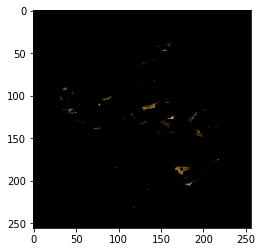

In [312]:
count=0
resImg=[]
for ele,ele2 in zip(lchannel.flatten(),l2.reshape(-1,3)):
    if ele==255:
        resImg.append(ele2)
        count+=1
    else:
        resImg.append([0,0,0])
resImg=np.array(resImg,dtype=np.uint8).reshape(l2.shape)
plt.imshow(resImg)

print('Diseased Pixel Count : {}\n\n'.format(count))
print('Total Pixel Count : {}\n\n'.format(totalLeafPix))

percentage=(count/totalLeafPix)*100

print('Percentage of leaf disease : {}\n\n'.format(percentage))


    
